### PCA

* 통계적으로 상관관계가 없도록 회전하여 성분을 만든다
* 주성분1을 찾는다. 분산이 가장 크고 데이터를 가장 잘 표현하는 성분
* 주성분2를 찾는다.
* 상관행렬(상관계수를 표현하는 행렬)에서 대각선을 제외한 모든 값이 0이 됨

In [1]:
import mglearn

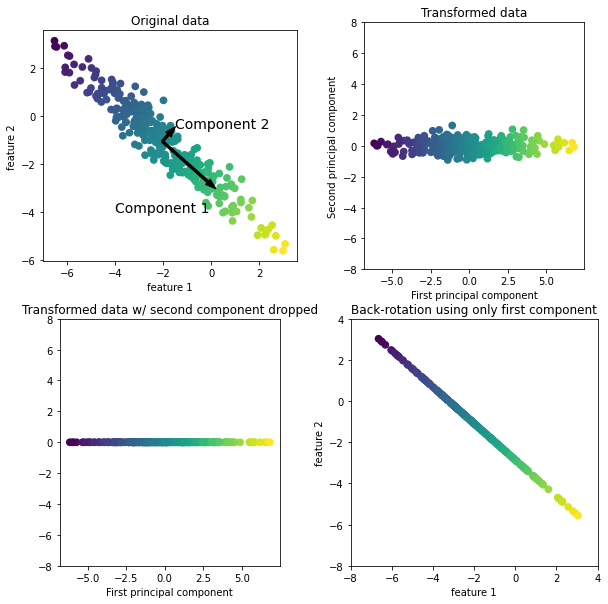

In [2]:
mglearn.plots.plot_pca_illustration()

In [3]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np

In [6]:
cancer = load_breast_cancer()

In [9]:
malignant = cancer.data[cancer.target==1]
benign = cancer.data[cancer.target==0]

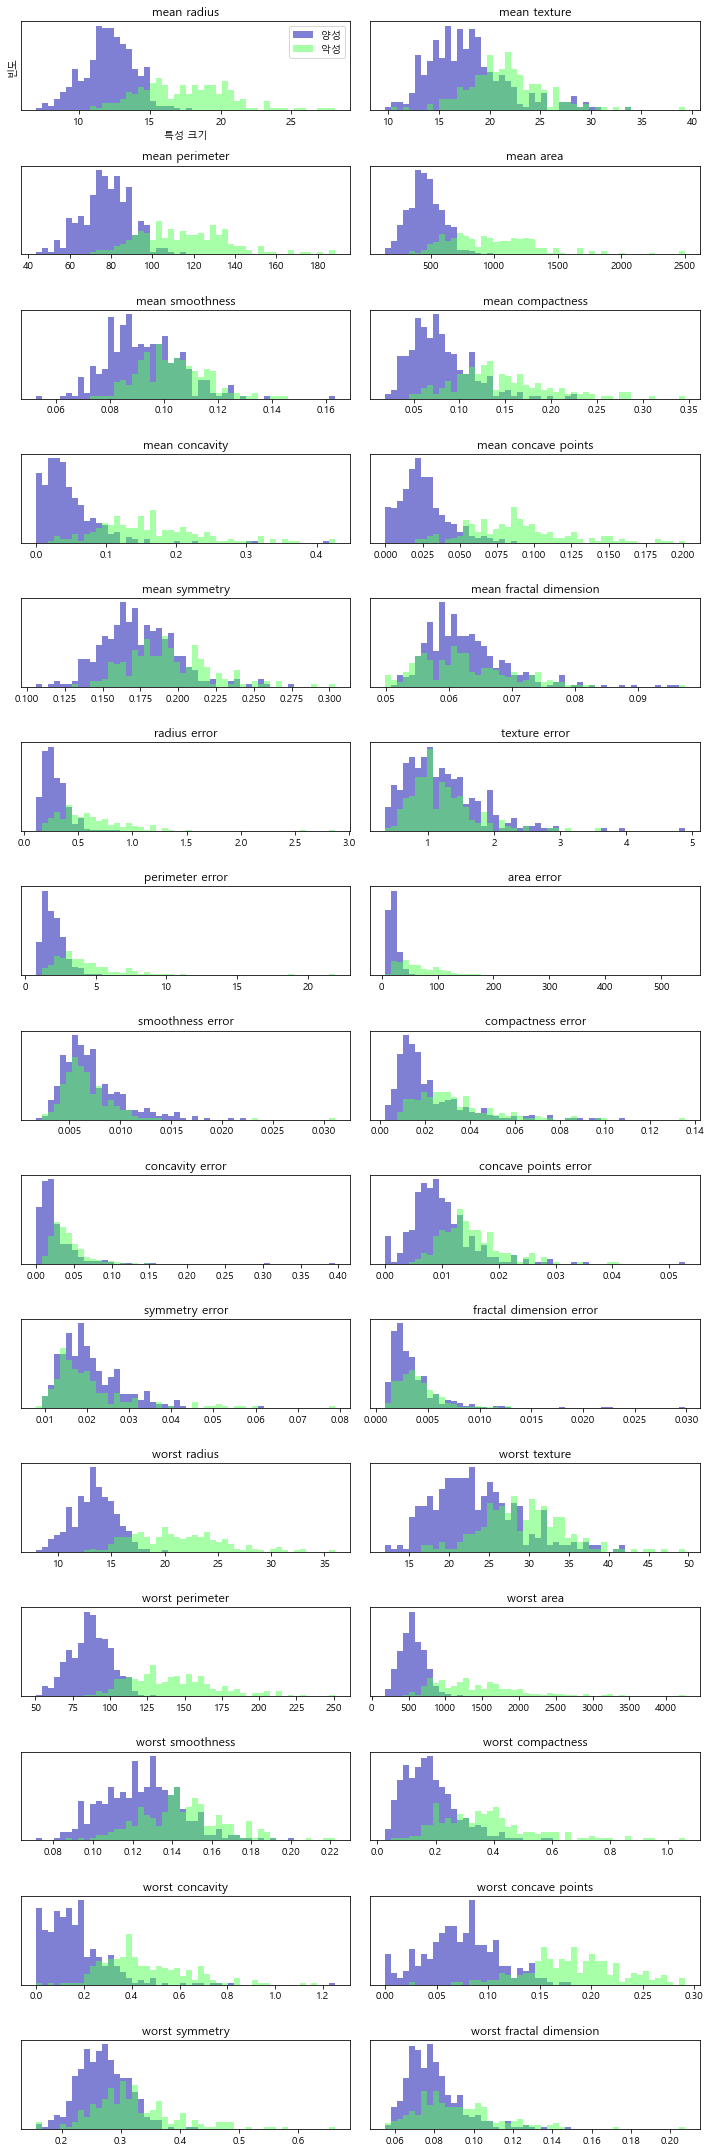

In [11]:
fig, axes = plt.subplots(15, 2, figsize=(10,30))

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(1), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

#X_scaled = sclaer.fit_transform(cancer.data)

In [19]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 : ", X_scaled.shape )
print("차원 축소 데이터 형태 : ",x_pca.shape )

원본 데이터 형태 :  (569, 30)
차원 축소 데이터 형태 :  (569, 2)


In [20]:
import mglearn

Text(0, 0.5, '두 번째 주성분')

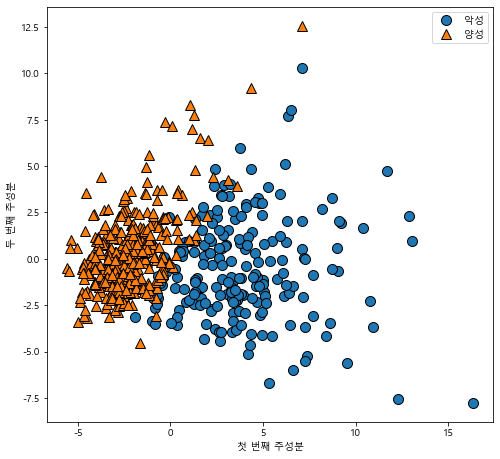

In [21]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 표시
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [22]:
print("PCA 주성분", pca.components_.shape)

PCA 주성분 (2, 30)


In [23]:
print("PCA 주성분 : ", pca.components_)

PCA 주성분 :  [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

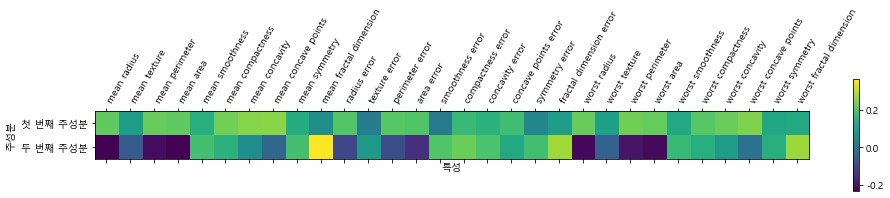

In [24]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [25]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)

Text(0, 0.5, '주성분')

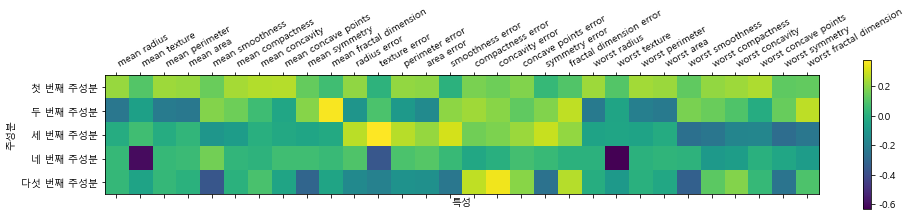

In [26]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1,2, 3, 4], ["첫 번째 주성분", "두 번째 주성분",
                           "세 번째 주성분", "네 번째 주성분", 
                           "다섯 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=30, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [28]:
from sklearn.decomposition import PCA
import seaborn as sns

In [29]:
iris = sns.load_dataset("iris")

X_iris = iris.drop("species", axis=1)
y_iris = iris['species']

print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [30]:
model = PCA()
X_pca_dat = model.fit_transform(X_iris)
print(X_pca_dat.shape, type(X_pca_dat))

(150, 4) <class 'numpy.ndarray'>


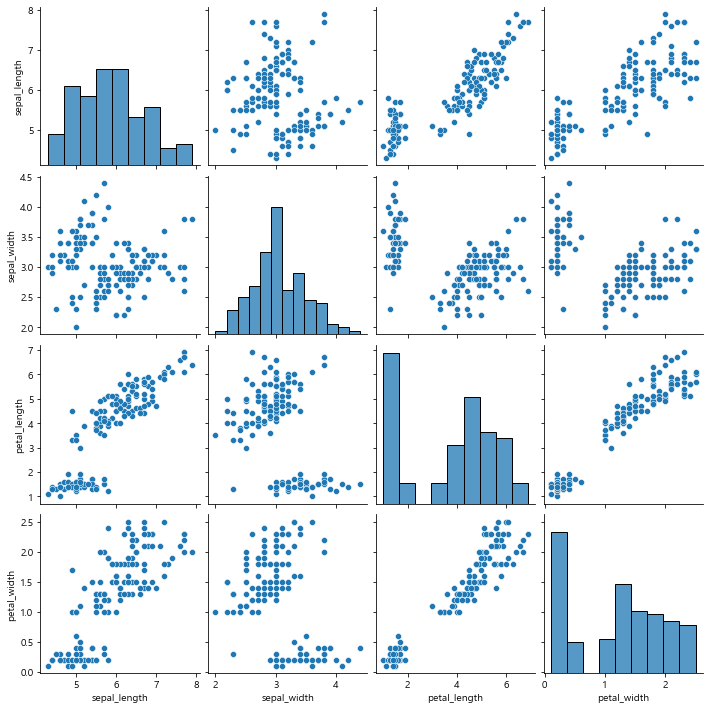

In [31]:
import seaborn as sns
sns.pairplot(iris)

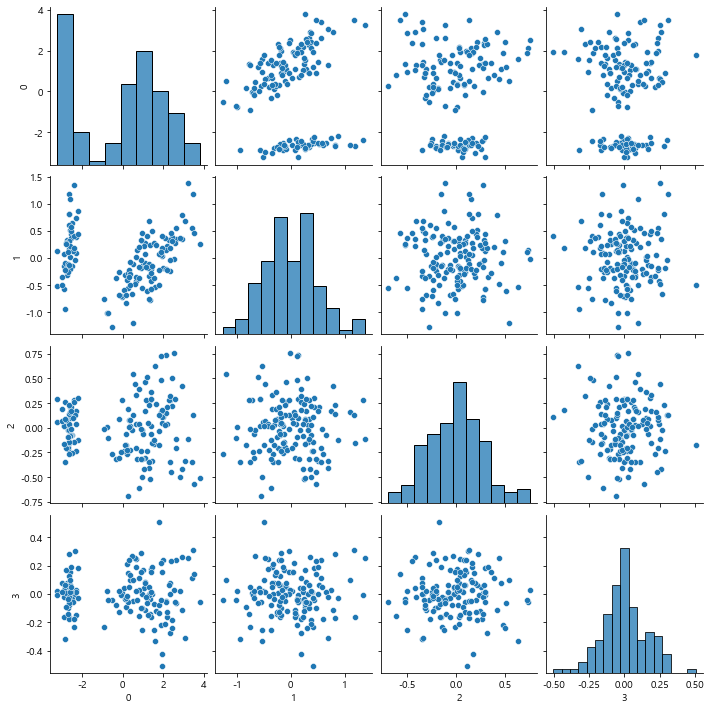

In [36]:
import pandas as pd

df = pd.DataFrame(X_pca_dat[0:,0:])
sns.pairplot(df)

In [37]:
df.corr()

,0,1,2,3
0,1.000000e+00,-6.142170e-17,0.000000e+00,-1.349595e-17
1,-6.142170e-17,1.000000e+00,2.866562e-16,8.021547e-17
2,0.000000e+00,2.866562e-16,1.000000e+00,2.674961e-16
3,-1.349595e-17,8.021547e-17,2.674961e-16,1.000000e+00


In [38]:
## 01 PCA() 
## 02 산점도 플롯
## 03 주성분1,2 내용 확인
model = PCA(n_components=2)
X_pca2 = model.fit_transform(X_iris)
print(X_pca2.shape, type(X_pca_dat))

(150, 2) <class 'numpy.ndarray'>


,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
5,-2.280860,0.741330
6,-2.820538,-0.089461
7,-2.626145,0.163385
8,-2.886383,-0.578312
9,-2.672756,-0.113774


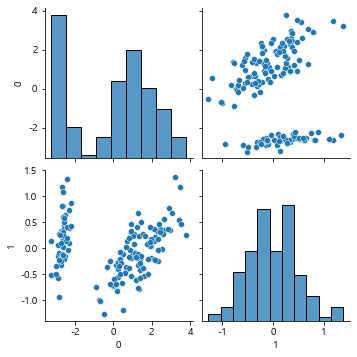

In [39]:
df = pd.DataFrame(X_pca2)
sns.pairplot(df)
df.head(10)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


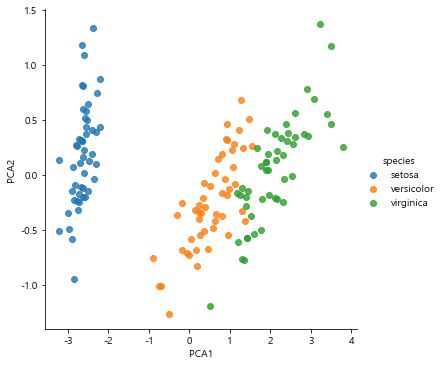

In [43]:
sns.lmplot('PCA1', 'PCA2', hue="species", data=iris, fit_reg=False)

In [44]:
iris['PCA1'] = df.iloc[:,0]  # feature 생성
iris['PCA2'] = df.iloc[:,1]  # feature 생성
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


In [45]:
model.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [46]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'PCA1', 'PCA2'],
      dtype='object')